In [1]:
from src.Normalizer import normalize_file
from src.Tokenizer import Tokenizer, SentenceTokenizer
from src.NgramModel import NGModel
from src.LIdentify import LIdentify
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Text Normalization

In [2]:
af_file = 'data/train.af.txt'
en_file = 'data/train.en.txt'
nl_file = 'data/train.nl.txt'
xh_file = 'data/train.xh.txt'
zu_file = 'data/train.zu.txt'

af_val_file = 'data/val.af.txt'
en_val_file = 'data/val.en.txt'
nl_val_file = 'data/val.nl.txt'
xh_val_file = 'data/val.xh.txt'
zu_val_file = 'data/val.zu.txt'

norm_af_file = 'data/normalized.af.txt'
norm_en_file = 'data/normalized.en.txt'
norm_nl_file = 'data/normalized.nl.txt'
norm_xh_file = 'data/normalized.xh.txt'
norm_zu_file = 'data/normalized.zu.txt'

# normalize_file(af_file, norm_af_file)
# normalize_file(en_file, norm_en_file)
# normalize_file(nl_file, norm_nl_file)
# normalize_file(xh_file, norm_xh_file)
# normalize_file(zu_file, norm_zu_file)

## Language Modelling

In [3]:
CHARS = [' ','0','<s>','</s>','a','b','c',
		 'd','e','f','g','h','i','j','k',
		 'l','m','n','o','p','q','r','s',
		 't','u','v','w','x','y','z']

In [4]:
af_model = NGModel(norm_af_file, CHARS, 'af', 3)
en_model = NGModel(norm_en_file, CHARS, 'en', 3)
nl_model = NGModel(norm_nl_file, CHARS, 'nl', 3)
xh_model = NGModel(norm_xh_file, CHARS, 'xh', 3)
zu_model = NGModel(norm_zu_file, CHARS, 'zu', 3)

### Text Generation

In [5]:
A = [1,2,3,4, 5, 6]
A[-3:]

[4, 5, 6]

In [6]:
af_model.generate(start='i')

'<s> i<s>bvpte polfselvan diesel die wand is dangevryf in rakte gel kond heids die heisie watuk</s><s> bal wat n '

### Perplexity

In [7]:
def perplexity(file_name, model, order, k=1e-8):
    sum_prob = 0
    sum_counter = 0
    with open(file_name) as file:
        for line in file:
            token = SentenceTokenizer(line.strip())
            a, b = model.sent_logprob(token, order, k)
            sum_prob += a 
            sum_counter +=b
    hc = - sum_prob/sum_counter 
    pp = 2**np.log2(np.exp(hc)) 
    return hc, pp

In [8]:
models = (af_model, en_model, nl_model, xh_model, zu_model)
val_files = (af_val_file, en_val_file, nl_val_file, xh_val_file, zu_val_file)

In [9]:
hcs = []
pps = []
for model in models:
    _hcs = []
    _pps = []
    for file in val_files:
        hc, pp = perplexity(file, model, 3, k=1e-8)
        _hcs.append(hc)
        _pps.append(pp)
    hcs.append(_hcs)
    pps.append(_pps)

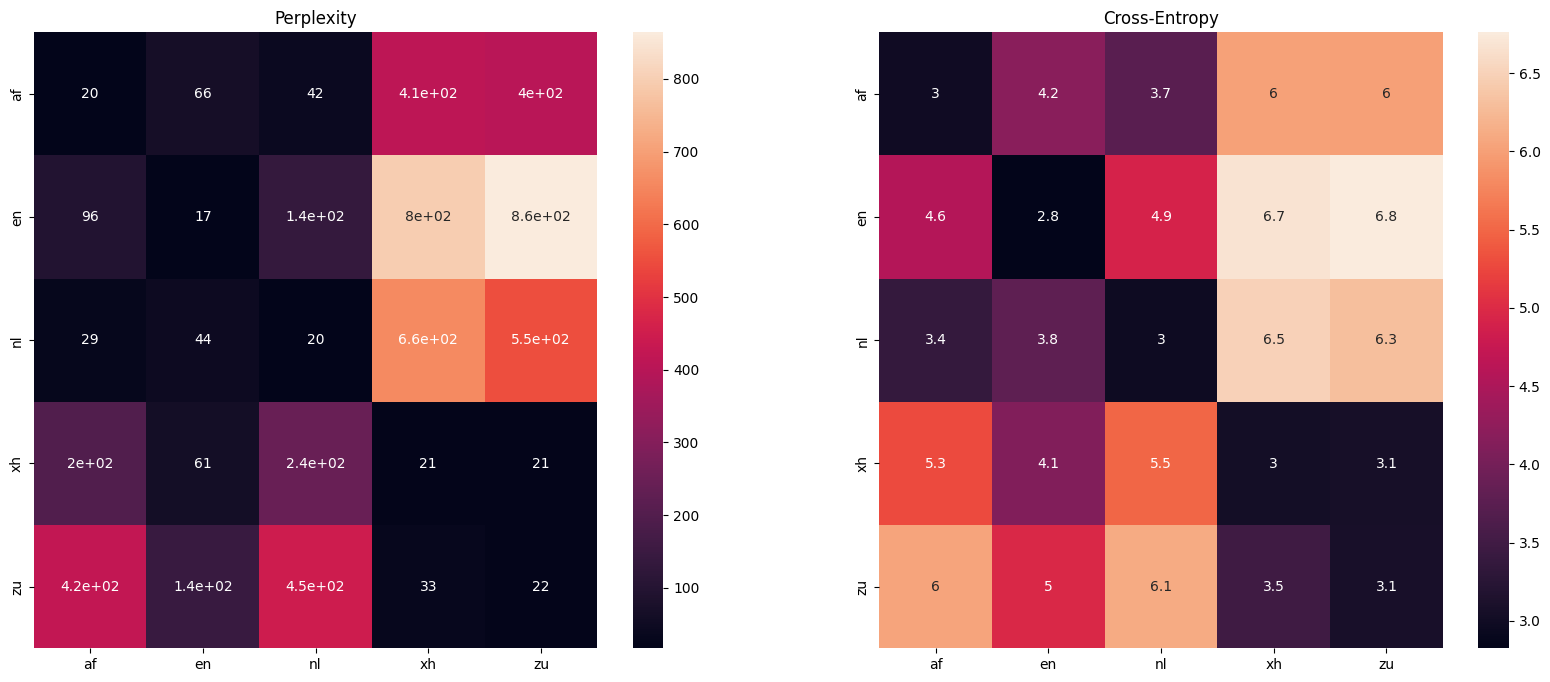

In [10]:
labels = categories=[model.name for model in models]
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.heatmap(pps, annot=True)
plt.xticks(np.arange(len(labels))+0.5,labels)
plt.yticks(np.arange(len(labels))+0.5,labels)
plt.title("Perplexity")
plt.subplot(122)
sns.heatmap(hcs, annot=True)
plt.xticks(np.arange(len(labels))+0.5,labels)
plt.yticks(np.arange(len(labels))+0.5,labels)
plt.title("Cross-Entropy")
plt.show()

## Language Identification

In [11]:
models = (af_model, en_model, nl_model, xh_model, zu_model)
identifiers = LIdentify(models)

In [12]:
print(identifiers.scoring(val_af_grams[3],3))
print(identifiers.scoring(val_en_grams[3],3))
print(identifiers.scoring(val_nl_grams[3],3))
print(identifiers.scoring(val_xh_grams[3],3))
print(identifiers.scoring(val_zu_grams[3],3))

AttributeError: 'LIdentify' object has no attribute 'scoring'